In [1]:
import pandas as pd # Import pandas library for data manipulation and analysis
import numpy as np  # Import numpy library for numerical operations
from sklearn.model_selection import train_test_split  # Import train_test_split function from sklearn to split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor   # Import RandomForestRegressor from sklearn to use the Random Forest algorithm for regression probles
from sklearn.metrics import mean_squared_error    # Import mean_squared_error from sklearn to evaluate the performance of the regression model
from sklearn.impute import SimpleImputer    # Import SimpleImputer from sklearn to handle missing values in the dataset
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from sklearn to convert categorical text data into model-understandable numerical data
import warnings # Import warnings library to control warning messages
warnings.filterwarnings('ignore')  # Suppress all warnings to ensure cleaner output during execution
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module to enable plotting and visualization. This module provides a MATLAB-like interface for creating a wide variety of plots and charts.
import seaborn as sns   # Import the seaborn module, a statistical data visualization library built on top of matplotlib that offers a higher-level interface for drawing attractive and informative statistical graphics.


# 1) Loading the dataset in order to first understand it

In [2]:
# Loading the dataset using a relative path
file_path = "Books.csv" 
books_df = pd.read_csv(file_path, sep=',')

In [3]:
# Display the first 5 rows of the books dataframe to get an overview of the data
books_df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
# Display the last 5 rows of the books dataframe to get an overview of the data
books_df.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.780000e+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780000e+12,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780000e+12,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780000e+12,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.790000e+12,spa,272,113,12,5/28/2006,Edimat Libros


# 2) Ensuring that the data is Clean

In [5]:
#Assessing the extent of missing data in your dataset. 
# Calculate the sum of null (missing) values in each column of the books dataframe

books_df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
#There are trailing space characters in front of the num_pages column. So we remove them 
books_df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

In [7]:
# Display data types of each column to verify consistency
books_df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [8]:
# Calculate and display the number of missing values in each column of the 'books_df' DataFrame. This helps in identifying which columns have missing data and may require cleaning or imputation before further analysis or modeling.

books_df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
# We check if there are any duplicated rows in the 'books_df' DataFrame. 
#This returns True if there are duplicates, and False otherwise, indicating whether data deduplication may be necessary.

books_df.duplicated().any()

False

In [10]:
# Summary statistics for numerical columns to check ranges and constraints
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759178e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428650e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780000e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780000e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780000e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790000e+12,6576.000000,4.597666e+06,94265.000000


The presence of books with 0 pages or 0 ratings/reviews may require further investigation to ensure data accuracy.

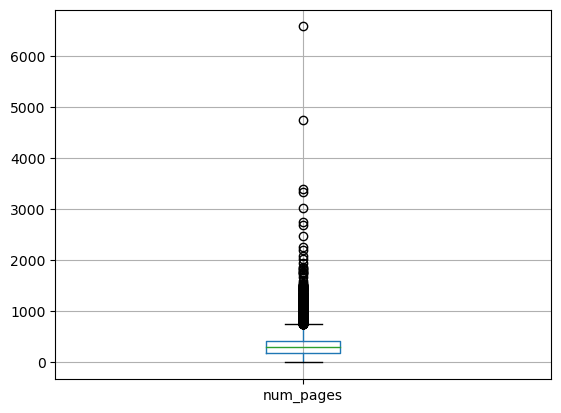

In [11]:
# Visualize outliers using box plots for numerical column 'num_pages'
books_df.boxplot(column=['num_pages']) 
plt.show()

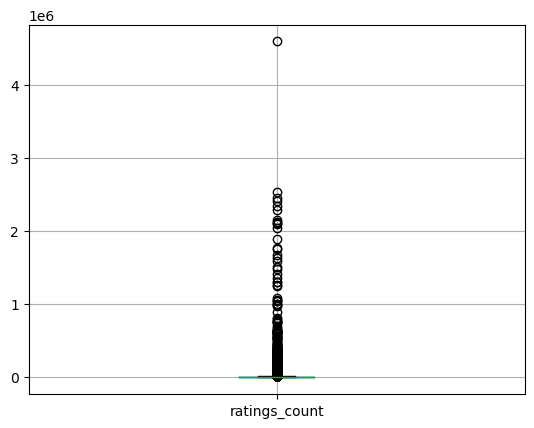

In [12]:
# Visualize outliers using box plots for numerical column 'ratings_count'
books_df.boxplot(column=['ratings_count']) 
plt.show()

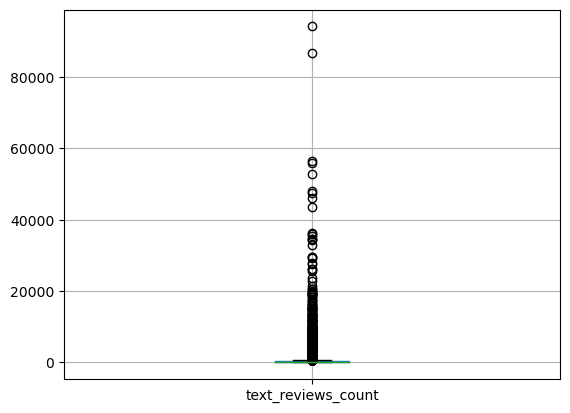

In [13]:
# Visualize outliers using box plots for numerical column 'text_reviews_count'

books_df.boxplot(column=['text_reviews_count']) 
plt.show()

Running some prelimary commands like books_df.dtypes for checking the datatypes of the different columns and books_df = pd.read_csv(file_path, sep=',') revealed some issues 

That the number of fields (columns) expected is 12, but it encountered 13 fields on bookid 12224.
We opened the CSV file, "Books.csv," and locate the line 12224. Check if there are any unexpected or extra values or if the data is not properly formatted.
in effect, part of the name occuppied the average column, and it caused the other columns to be shifted.
The name was brought where it is supposed to be and the other columns shifted to the left as it is normally supposed to be.

We had to do some rearrangements on the excel data where some author's information shifted into the average rating column. The case of column in the dataset (16914) where the average rating is the value  "one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)".
We have the case of line 22128 with the 'Rawles' text found in the average rating column.
Also we have 34889 with 'Son & Ferguson'

In [14]:
# Calculate the number of authors per book by splitting the 'authors' column and counting the elements
# Calculate the number of publishers per book by splitting the 'publisher' column and counting the elements
# Convert 'publication_date' column to datetime format, coercing any errors

In [15]:
# Initial data preprocessing
books_df['num_authors'] = books_df['authors'].apply(lambda x: len(x.split('/')))
books_df['num_publishers'] = books_df['publisher'].apply(lambda x: len(x.split('/')))

In [16]:
missing_pub_date_book_ids = books_df[books_df.publication_date.isna()]['bookID']
print(missing_pub_date_book_ids)


Series([], Name: bookID, dtype: int64)


In [17]:
#Assuming books_df['publication_date'] is already converted to datetime with 'coerce' for errors
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce')

In [18]:
# Additional feature engineering
books_df['author_popularity'] = books_df['authors'].str.split('/').explode().map(books_df['authors'].str.split('/').explode().value_counts()).groupby(level=0).sum()
books_df['publisher_popularity'] = books_df['publisher'].str.split('/').explode().map(books_df['publisher'].str.split('/').explode().value_counts()).groupby(level=0).sum()
books_df['title_occurrences'] = books_df['title'].map(books_df['title'].value_counts())
books_df = pd.concat([books_df, pd.get_dummies(books_df['language_code'], prefix='lang')], axis=1)
current_year = pd.to_datetime('now').year
books_df['years_since_publication'] = current_year - books_df['publication_date'].dt.year

In [19]:
# Define bins for publication period categorization
bins = pd.to_datetime(['1900-01-01', '1999-12-31', '2009-12-31', '2019-12-31', '2023-12-31'])
labels = ['Before 2000', '2000-2009', '2010-2019', '2020-2023']
books_df['publication_period'] = pd.cut(books_df['publication_date'], bins=bins, labels=labels)

In [20]:
#Create 3 new columns for the year, the month and the day of publication
books_df['year'] = books_df['publication_date'].dt.year
books_df['month'] = books_df['publication_date'].dt.month
books_df['day'] = books_df['publication_date'].dt.day

In [21]:
books_df.isnull().sum()

bookID                     0
title                      0
authors                    0
average_rating             0
isbn                       0
isbn13                     0
language_code              0
num_pages                  0
ratings_count              0
text_reviews_count         0
publication_date           0
publisher                  0
num_authors                0
num_publishers             0
author_popularity          0
publisher_popularity       0
title_occurrences          0
lang_ale                   0
lang_ara                   0
lang_en-CA                 0
lang_en-GB                 0
lang_en-US                 0
lang_eng                   0
lang_enm                   0
lang_fre                   0
lang_ger                   0
lang_gla                   0
lang_glg                   0
lang_grc                   0
lang_ita                   0
lang_jpn                   0
lang_lat                   0
lang_msa                   0
lang_mul                   0
lang_nl       

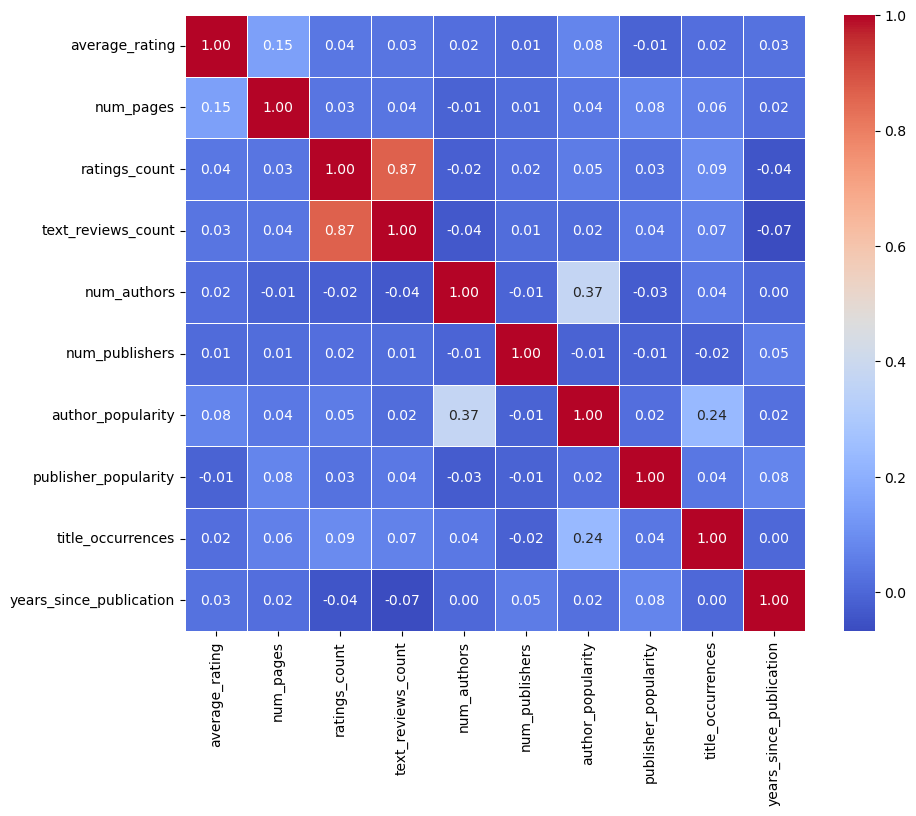

In [22]:
numerical_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'num_authors', 'num_publishers', 'author_popularity', 'publisher_popularity', 'title_occurrences', 'years_since_publication']
numerical_df = books_df[numerical_cols]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [23]:
# Select features and target
features = ['ratings_count', 'num_pages', 'years_since_publication', 'publisher_popularity', 'author_popularity', 'text_reviews_count'] + [col for col in books_df.columns if col.startswith('lang_')]
target = 'average_rating'
X = books_df[features]
y = books_df[target]

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [26]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Evaluate the model
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [28]:
# Print results
print(f'RMSE: {rmse}')

RMSE: 0.322411250866862


In [29]:
modelling_df=books_df

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting a subset of variables for the model (example)
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'num_authors', 'publisher_popularity']
target = 'average_rating'

X = modelling_df[features]
y = modelling_df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test)

# Calculate and print the R^2 and Mean Squared Error (MSE)
print("R^2 (Coefficient of Determination):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R^2 (Coefficient of Determination): 0.025965628662345752
Mean Squared Error (MSE): 0.11781699677238235
